<a href="https://colab.research.google.com/github/fiftybucks101/Naive-Baye-s/blob/main/Iris_dataset_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
species = df['species'].unique()
species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

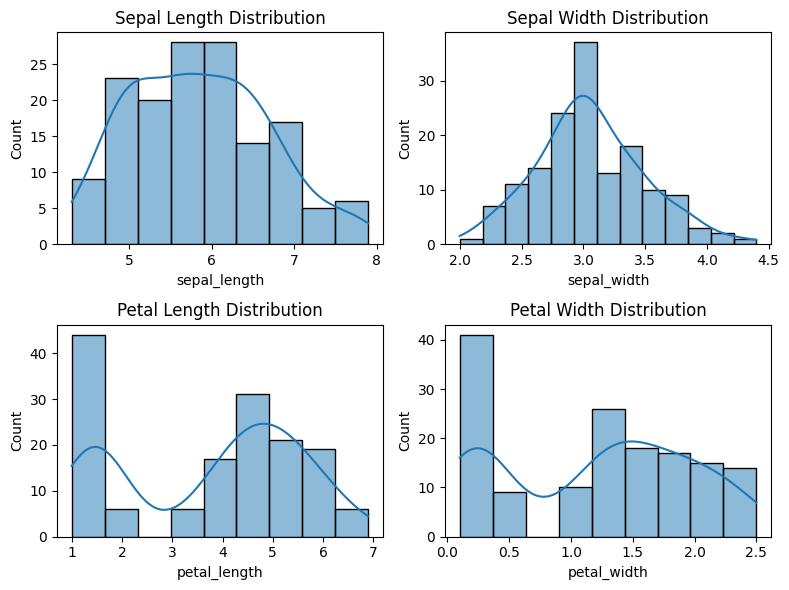

In [28]:
# multiple histogram plot using subplot

fig, axs = plt.subplots(2,2,figsize=(8,6))

sns.histplot(x=df['sepal_length'], kde=True, ax= axs[0,0])
axs[0,0].set_title('Sepal Length Distribution')
sns.histplot(data=df, x='sepal_width', kde=True, ax= axs[0,1])
axs[0,1].set_title('Sepal Width Distribution')
sns.histplot(data=df, x='petal_length', kde=True, ax= axs[1,0])
axs[1,0].set_title('Petal Length Distribution')
sns.histplot(data=df, x='petal_width', kde=True, ax= axs[1,1])
axs[1,1].set_title('Petal Width Distribution')

plt.tight_layout()

**Experimenting with different types of Naive Bayes ML Algo**

In [29]:
# Encoding species using map function

df['species'] = df['species'].map({'setosa':1,'versicolor':2,'virginica':3})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [30]:
# Dependent and Independent feature abstraction

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [31]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
df['species'].unique()

array([1, 2, 3])

In [33]:
# test train split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
X_train.shape

(112, 4)

In [35]:
X_test.shape

(38, 4)

In [36]:
df['petal_width'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [37]:
# Importing Gaussian Naive Bayes, Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB, GaussianNB

mn = MultinomialNB()
gs = GaussianNB()

In [38]:
# Give training data to both algo

mn.fit(X_train,y_train)
gs.fit(X_train,y_train)

GaussianNB()

In [39]:
pred_multi = mn.predict(X_test)
pred_gauss = gs.predict(X_test)

Accuracy Score of MultiNomial Naive Bayes =  0.9736842105263158
Accuracy Score of Gaussian Naive Bayes =  1.0
Classification Report of Multinomial Naive Bayes
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.92      1.00      0.96        11
           3       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Classification Report of Gaussian Naive Bayes
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



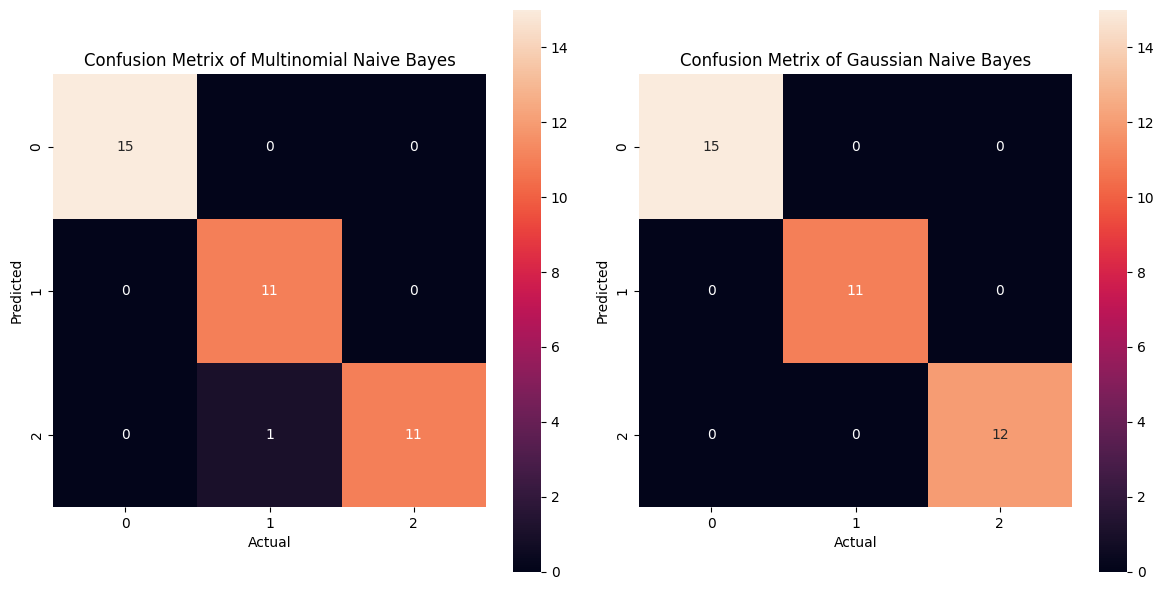

In [86]:
# All metrics for classification

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy Score of MultiNomial Naive Bayes = ",accuracy_score(y_test,pred_multi))
print("Accuracy Score of Gaussian Naive Bayes = ",accuracy_score(y_test,pred_gauss))
print("Classification Report of Multinomial Naive Bayes\n", classification_report(y_test,pred_multi))
print("Classification Report of Gaussian Naive Bayes\n", classification_report(y_test,pred_gauss))

# confusion matirix for both multinomial and gaussian navie bayes
confuse_multi = confusion_matrix(y_test,pred_multi)
confuse_gauss = confusion_matrix(y_test,pred_gauss)

fig, axs = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(data=confuse_multi,square=True,annot=True, ax=axs[0])
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title("\nConfusion Metrix of Multinomial Naive Bayes")
sns.heatmap(confuse_gauss,square=True,annot=True,ax=axs[1])
axs[1].set_title("\nConfusion Metrix of Gaussian Naive Bayes")
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')
plt.tight_layout()

In [51]:
gs.predict([[5,5,5,5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([3])

In [56]:
def predict(n):
  pred = gs.predict(n)

  for i, specie in enumerate(species):
    if pred == i+1:
      print("Flower Species: ",specie)

In [57]:
predict([[2,5,5,2]])

Flower Species:  virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [58]:
predict([[1,2,2,1]])

Flower Species:  versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [59]:
predict([[2,2,3,1]])

Flower Species:  versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [60]:
predict([[1,1,1,1]])

Flower Species:  versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [61]:
predict([[1,3,4,1]])

Flower Species:  versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [62]:
predict([[4.9,3.0,1.4,0.2]])

Flower Species:  setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [63]:
predict([[1,3.0,1.4,1]])

Flower Species:  versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
